In [56]:
# install full version
!pip install pycaret[full]

In [57]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-h8lfixef
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-h8lfixef
  Resolved https://github.com/pycaret/pycaret.git to commit 885ebb81055ac017e50080db7731973d1a222e19
  Preparing metadata (setup.py) ... done


Explanation of this project :

Based on the problem description of predicting the plant species present at a given location, this would typically involve a classification machine learning method rather than linear regression.


Classification is a supervised learning technique where the goal is to assign a categorical class label (e.g., plant species name) to new data points based on learning from a training dataset containing examples with known class labels.

Some common classification algorithms that could be applied to this plant species prediction problem include:


1) Decision Trees

2) Random Forests

3) Support Vector Machines (SVMs)

4) Naive Bayes

5) Logistic Regression

6) Neural Networks



Linear regression, on the other hand, is used for predicting a continuous numerical value output rather than a categorical class. It models the relationship between independent variables (e.g. environmental factors) and a dependent variable (e.g. plant abundance) as a linear equation.

Since the goal here is to predict the specific plant species names/labels at a location based on environmental conditions, this fits better as a classification task. Each plant species would be treated as a distinct class label.

However, in some cases, researchers may first use regression methods to model species abundance/distribution as a function of environmental variables, and then classify presence/absence based on the predicted abundance values. But predominantly, species distribution modeling relies on classification algorithms to directly predict the categorical species labels.

In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('/content/GLC24_PA_metadata_train.csv')

In [60]:
data.head(10)

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
5,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,10520.0,212
6,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,9458.0,212
7,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,982.0,212
8,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,51.0,212
9,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,3935.0,212


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483637 entries, 0 to 1483636
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   lon                1483637 non-null  float64
 1   lat                1483637 non-null  float64
 2   year               1483637 non-null  int64  
 3   geoUncertaintyInM  1471141 non-null  float64
 4   areaInM2           1300365 non-null  float64
 5   region             1483637 non-null  object 
 6   country            1483637 non-null  object 
 7   speciesId          1483637 non-null  float64
 8   surveyId           1483637 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 101.9+ MB


In [62]:
import pandas as pd

# Remove rows with missing values
data.dropna(inplace=True)

In [63]:
data

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
...,...,...,...,...,...,...,...,...,...
1483632,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655


In [64]:
# Convert string columns to numeric
numeric_columns = ['speciesId', 'surveyId']  # Specify the columns that should be numeric

In [65]:
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [66]:
data

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
...,...,...,...,...,...,...,...,...,...
1483632,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655


In [67]:
# using pandas to identify and remove rows with infinite values

import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Check for infinite values in the DataFrame
has_infinite = data.isin([float('inf'), float('-inf')]).any(axis=None)

# If any infinite values are found, remove the corresponding rows
if has_infinite:
    data = data[~data.isin([float('inf'), float('-inf')]).any(axis=1)]

# Now you can proceed with your analysis or further processing

In [72]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['speciesId'] = data['speciesId'].astype('int64')

# Display the DataFrame to confirm the change
print(data.dtypes)

lon                  float64
lat                  float64
year                   int64
geoUncertaintyInM    float64
areaInM2             float64
region                object
country               object
speciesId              int64
surveyId               int64
dtype: object


In [76]:
# Check the number of unique values in the target variable
unique_values = data['speciesId'].nunique()

# Print the result
print(f"Number of unique values in 'speciesId': {unique_values}")

Number of unique values in 'speciesId': 4822


Classification using PyCaret

In [106]:
from pycaret.classification import setup
import pandas as pd
from sklearn.datasets import make_classification

# Create a sample dataset with imbalanced classes
data = make_classification(n_samples=100, n_features=4, n_classes=3, n_clusters_per_class=1, weights=[0.6, 0.3, 0.1], random_state=42)
df = pd.DataFrame(data[0], columns=[f'feature_{i}' for i in range(1, 5)])
df['speciesId'] = data[1]

# Check class distribution
class_distribution = df['speciesId'].value_counts()
print("Class distribution:")
print(class_distribution)

# Check if any class has only one instance
if class_distribution.min() < 2:
    # Handle the situation where a class has only one instance
    print("One or more classes have only one instance. Handle this situation appropriately.")
else:
    # Setup the Pycaret classification
    s = setup(data=df, target='speciesId', session_id=123)
    # Continue with model training


Class distribution:
speciesId
0    60
1    30
2    10
Name: count, dtype: int64


,Description,Value
0,Session id,123
1,Target,speciesId
2,Target type,Multiclass
3,Original data shape,"(100, 5)"
4,Transformed data shape,"(100, 5)"
5,Transformed train set shape,"(70, 5)"
6,Transformed test set shape,"(30, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [107]:
# compare best model API

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9857,0.0000,0.9000,0.9000,0.9000,0.9682,0.9715,0.8710
knn,K Neighbors Classifier,0.9857,0.7000,0.9000,0.9000,0.9000,0.9682,0.9715,0.0520
qda,Quadratic Discriminant Analysis,0.9857,0.0000,0.9000,0.9000,0.9000,0.9682,0.9715,0.0340
nb,Naive Bayes,0.9714,0.7000,0.8857,0.8762,0.8800,0.9423,0.9487,0.0340
svm,SVM - Linear Kernel,0.9714,0.0000,0.8857,0.8762,0.8800,0.9423,0.9487,0.0390
ridge,Ridge Classifier,0.9714,0.0000,0.8857,0.8762,0.8800,0.9423,0.9487,0.0340
xgboost,Extreme Gradient Boosting,0.9714,0.7000,0.8857,0.8743,0.8794,0.9402,0.9476,0.0690
lightgbm,Light Gradient Boosting Machine,0.9714,0.7000,0.8857,0.8762,0.8800,0.9423,0.9487,0.1810
lda,Linear Discriminant Analysis,0.9571,0.0000,0.8714,0.8690,0.8657,0.9181,0.9272,0.0320
et,Extra Trees Classifier,0.9571,0.6976,0.8714,0.8524,0.8600,0.9163,0.9258,0.1630


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [108]:
# Analyze Model

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [109]:
# predictions

predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,feature_1,feature_2,feature_3,feature_4,speciesId,prediction_label,prediction_score
80,-1.559106,-0.334315,-1.045076,0.378790,0,0,0.9726
49,-1.099776,0.371486,-0.989455,1.045783,0,0,0.9863
27,2.100366,2.581129,0.522789,2.221406,1,1,0.9937
22,-1.380295,-0.012781,-1.042854,0.698409,0,0,0.9845
5,-0.956680,0.403053,-0.893905,1.012151,0,0,0.9762
66,-1.177097,0.123490,-0.945156,0.767886,0,0,0.9776
71,2.901147,3.572376,0.719128,3.077527,1,1,0.9981
25,-1.160536,0.153369,-0.944992,0.797616,0,0,0.9783
57,0.974777,1.209626,0.237754,1.045987,1,1,0.9621
43,-0.573012,1.028653,-0.862425,1.615506,0,0,0.9768


In [126]:
#create decision tree model

dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0000,0.0000,0.0000,0.0000,0.6818,0.7151
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8571,0.9000,0.8571,0.7619,0.8000,0.7407,0.7715
8,0.8571,0.8333,0.8571,0.7429,0.7937,0.7200,0.7606


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

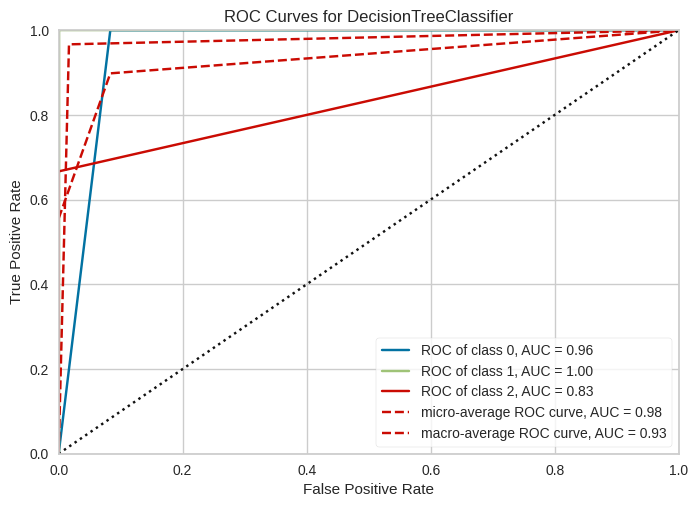

In [127]:
plot_model(dt)

In [128]:
save_model(dt, 'deployment_07052024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['feature_1', 'feature_2',
                                              'feature_3', 'feature_4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, inc...
                                                               missing_values=nan,
                                                 

In [130]:
deployment_07052024 = load_model('deployment_07052024')

Transformation Pipeline and Model Successfully Loaded


In [131]:
deployment_07052024

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclu...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)